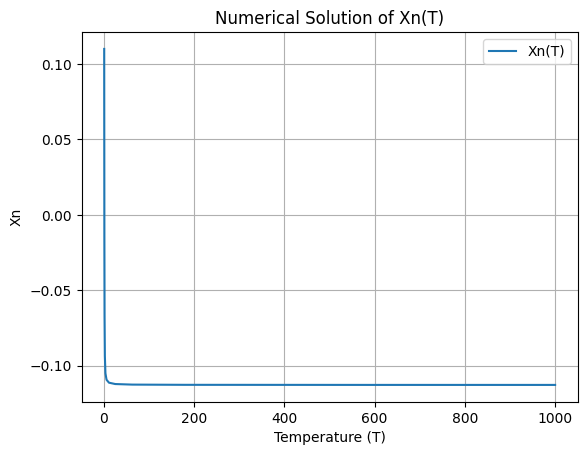

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
tau_n = 877.75  # Neutron mean lifetime (in seconds)
constant = 105.12 / tau_n  # Pre-factor

# Define the ODE
def dXn_dT(x, Xn):
    exp = np.exp(-x)
    term1 = exp - Xn * (1 + exp)
    term2 = 12 + (6*x) + (x**2)
    return -constant * term1 * term2 / x**4

# Initial conditions
x0 = 1  # Initial temperature (change as needed)
Xn0 = 0.11  # Initial value of Xn (change as needed)
x_end = 1000  # Final temperature for integration

# Solve the ODE
solution = solve_ivp(
    dXn_dT,
    t_span=(x0, x_end),
    y0=[Xn0],
    method='RK45',
    dense_output=True
)

# Extract solution
T_vals = solution.t
Xn_vals = solution.y[0]

# Plot the solution
plt.plot(T_vals, Xn_vals, label="Xn(T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Xn")
plt.title("Numerical Solution of Xn(T)")
plt.legend()
plt.grid()
plt.show()
